# Loading in Data

Loading the scrapped data to pandas

In [33]:
import pandas as pd
import glob
import os
import numpy as np

path = ""
all_files = glob.glob(os.path.join(path, "*.csv"))
activity_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
activity_df['Created'] = pd.to_datetime(activity_df['Created'])
activity_df['Updated'] = pd.to_datetime(activity_df['Updated'])
# activity_df = activity_df[activity_df['User'].isin(["XXX"])]

# Filter by REPO
activity_df = activity_df[activity_df['SrcRepo'].isin(["finaccelteam/krdv-b2b-user", 
	"finaccelteam/krdv-b2b-transaction", "finaccelteam/ffi-krdv-b2b-partners", "finaccelteam/ffi-krdv-b2b", 
	"finaccelteam/seit-project-b2b"])]

# Filter by Dates
activity_df = activity_df[(activity_df['Updated'] >= '2024-01-01') & (activity_df['Updated'] <= '2024-01-31')]

pr_df = activity_df[["ID", "SrcRepo", "SrcBranch", "DestRepo", "DestBranch", "Title", "Description", "State", "Author", "Created", "Updated",
			"FileChanged", "Added", "Removed", "Total"]].copy().drop_duplicates()
# pr_df = pr_df[pr_df['Author'].isin(["XXX"])]

Make sure the data is loaded properly and do column manipulation for further analysis

In [34]:
activity_df['DateGroup'] = activity_df['Updated'].dt.strftime('%Y-%m')
activity_df['SrcRepo'] = activity_df['SrcRepo'].str.split('/').str[1]
activity_df['DestRepo'] = activity_df['DestRepo'].str.split('/').str[1]
activity_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,Type,User,Content,DateGroup
1368,12,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,B2B-1159 automation oppo repayment flow,* modify sql query for get loans\n\n‌,MERGED,Mesa Bastian,2024-01-11,2024-01-16,1,8,4,12,approval,Jamal Abdun Naser Bachmid,2024-01-12,2024-01
1369,12,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,B2B-1159 automation oppo repayment flow,* modify sql query for get loans\n\n‌,MERGED,Mesa Bastian,2024-01-11,2024-01-16,1,8,4,12,approval,Nicolas Evander,2024-01-12,2024-01
1370,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Nicolas Evander,2024-01-04,2024-01
1371,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Jamal Abdun Naser Bachmid,2024-01-04,2024-01
1372,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Mesa Bastian,2024-01-04,2024-01


In [35]:
cross_activity_df = activity_df.copy()
cross_activity_df.head()

# TODO: Needs to fix this for batch
#cond = cross_activity_df[ (cross_activity_df['User'] >= "XXX") & (cross_activity_df['Author'] == "XXX")].index
#cross_activity_df.drop(cond, inplace = True)

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,Type,User,Content,DateGroup
1368,12,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,B2B-1159 automation oppo repayment flow,* modify sql query for get loans\n\n‌,MERGED,Mesa Bastian,2024-01-11,2024-01-16,1,8,4,12,approval,Jamal Abdun Naser Bachmid,2024-01-12,2024-01
1369,12,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,B2B-1159 automation oppo repayment flow,* modify sql query for get loans\n\n‌,MERGED,Mesa Bastian,2024-01-11,2024-01-16,1,8,4,12,approval,Nicolas Evander,2024-01-12,2024-01
1370,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Nicolas Evander,2024-01-04,2024-01
1371,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Jamal Abdun Naser Bachmid,2024-01-04,2024-01
1372,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,approval,Mesa Bastian,2024-01-04,2024-01


In [36]:
pr_df['DateGroup'] = pr_df['Updated'].dt.strftime('%Y-%m')
pr_df['SrcRepo'] = pr_df['SrcRepo'].str.split('/').str[1]
pr_df['DestRepo'] = pr_df['DestRepo'].str.split('/').str[1]
pr_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,DateGroup
1368,12,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,B2B-1159 automation oppo repayment flow,* modify sql query for get loans\n\n‌,MERGED,Mesa Bastian,2024-01-11,2024-01-16,1,8,4,12,2024-01
1370,5,seit-project-b2b,B2B-1058-automation-create-merchant,seit-project-b2b,master,add create merchant script,add create merchant API script,MERGED,Aisha Wirawanti,2024-01-03,2024-01-04,2,34,0,34,2024-01
1373,6,seit-project-b2b,B2B-1134-automation-integrated-karate-automati...,seit-project-b2b,master,B2B-1134 automation integrated karate automati...,* jenkins file\n* feature file sub merchnat\n*...,DECLINED,Mesa Bastian,2024-01-04,2024-01-04,4,60,26,86,2024-01
1376,10,seit-project-b2b,B2B-1159-automation-oppo-repayment-flow,seit-project-b2b,master,Add Feature Repayment,Add Feature for Repayment Oppo \nAdd function...,MERGED,Mesa Bastian,2024-01-10,2024-01-11,10,199,2,201,2024-01
1378,9,seit-project-b2b,user-revamp,seit-project-b2b,master,Clean up folder,clean up folder to proper way,MERGED,Nicolas Evander,2024-01-04,2024-01-05,6,12,12,24,2024-01


# PR Data Analysis

## Grouped by Repositories

[Text(0, 0, '34'),
 Text(0, 0, '1438'),
 Text(0, 0, '596'),
 Text(0, 0, '200'),
 Text(0, 0, '3506'),
 Text(0, 0, '3151'),
 Text(0, 0, '1812'),
 Text(0, 0, '368'),
 Text(0, 0, '471'),
 Text(0, 0, '2020'),
 Text(0, 0, '116'),
 Text(0, 0, '2275'),
 Text(0, 0, '606'),
 Text(0, 0, '7454'),
 Text(0, 0, '1224'),
 Text(0, 0, '11967'),
 Text(0, 0, '2679'),
 Text(0, 0, '5597'),
 Text(0, 0, '73')]

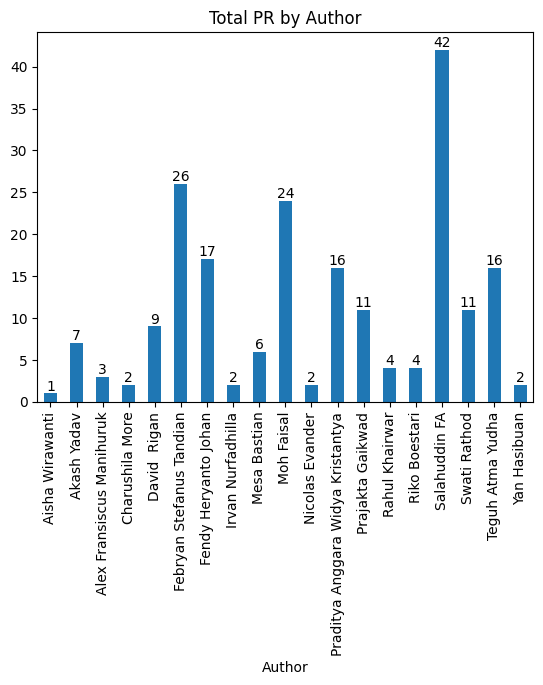

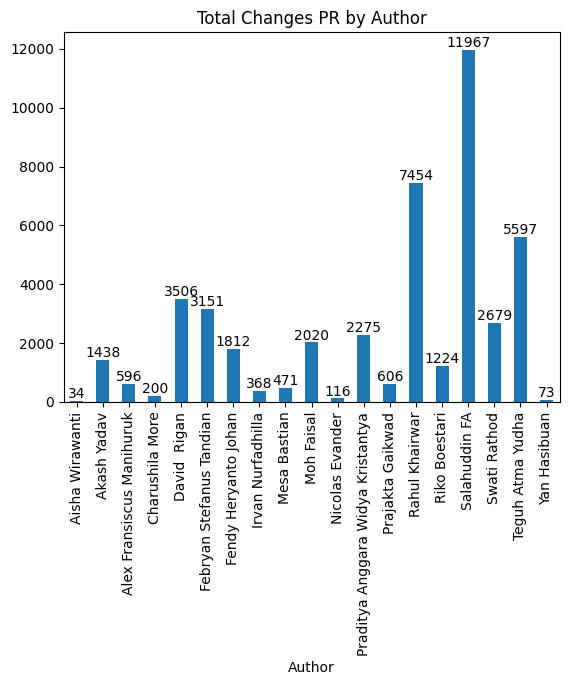

In [37]:
def pr_total_pr_count_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].count()

def pr_total_sum_group_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].sum()

repo_group = pr_total_pr_count_by(pr_df, ['Author'])
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total PR by Author')
repo_group.set_ylabel('');
repo_group.bar_label(repo_group.containers[0])

repo_group = pr_total_sum_group_by(pr_df, ['Author'])
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total Changes PR by Author')
repo_group.set_ylabel('');
repo_group.bar_label(repo_group.containers[0])

# PR Activity Analysis

## Group by Repositories

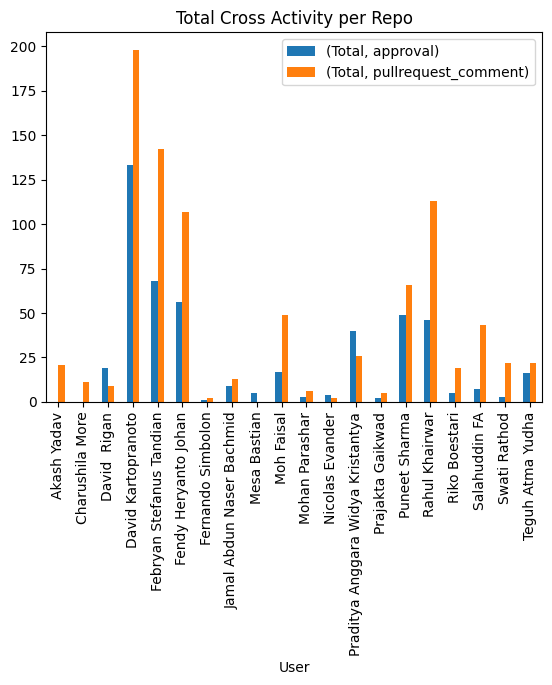

In [38]:
cross_activity_repo_pivot = cross_activity_df.pivot_table( index='User', columns='Type', values=['Total'], aggfunc='count')
cross_activity_repo_pivot = cross_activity_repo_pivot.plot(kind="bar", legend=True)
cross_activity_repo_pivot.set_title('Total Cross Activity per Repo')
cross_activity_repo_pivot.set_ylabel('');
cross_activity_repo_pivot.legend(bbox_to_anchor=(1.0, 1.0))